In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
#실습) 스팸일까? 아닐까?
filename = r'input\spam.csv'
df = pd.read_csv(filename,encoding='latin-1')
# replace the null values with a null string
sms = df.where((pd.notnull(df)),'')
sms.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [75]:
# 불필요한 열 삭제
sms = sms.drop(sms.columns[[2,3,4]],axis=1)

In [76]:
# The column names like 'v1' and 'v2' aren't meaningful, so let's rename them.
# 컬럼 이름 수정
sms = sms.rename(columns={'v1': 'target', 'v2': 'message'})

In [ ]:
sms.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#기초 정보
sms.shape

(5572, 2)

In [79]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [80]:
sms.describe().T

,count,unique,top,freq
target,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [85]:
# 워드 클라우드 라이브러리 불러오기
from wordcloud import WordCloud
# traget =='spam' 인 것을 찾는다 -> message 속성의 텍스트만 추출 ->
# 하나만 문자열 변수에 공백 포함 합친다

spam_words = ' '.join(sms.loc[sms['target']=='spam']['message'])
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

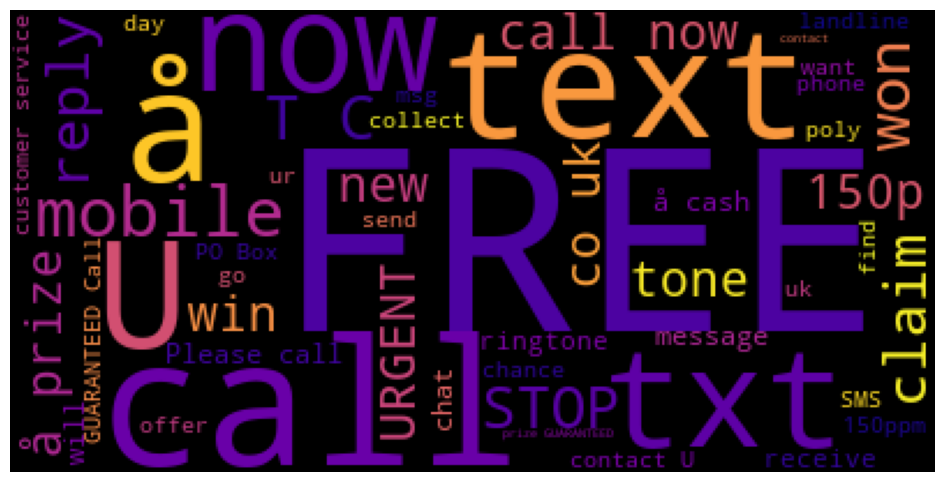

In [86]:
# 합친 문장을 워드 클라우드로 출력 -> spam

spam_wc = WordCloud(colormap='plasma',max_words=50).generate(spam_words)

plt.figure(figsize=(24,6))
plt.axis('off') # x,y 축의 눈급 제거
plt.imshow(spam_wc) # 워드 클라우디 출력
plt.show()

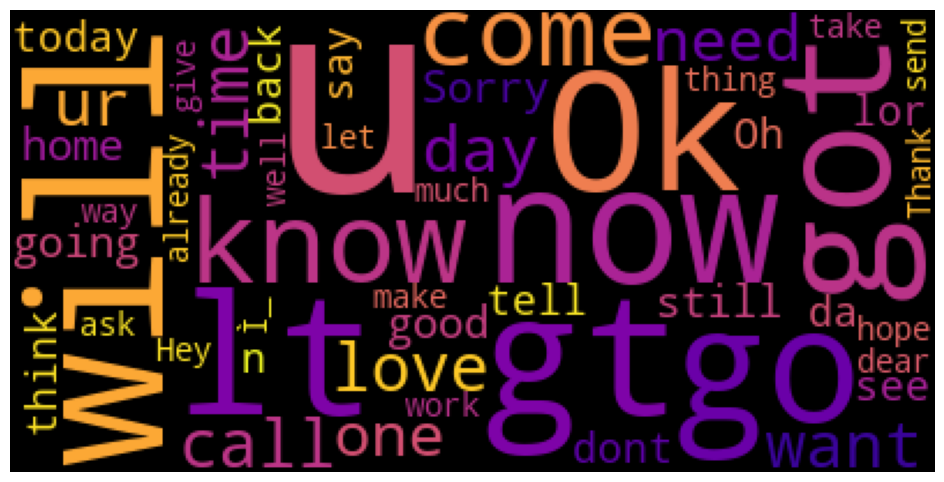

In [87]:
# target 속성값 'ham' <- 스펨이 아는것

ham_words = ' '.join(sms.loc[sms['target'] == 'ham']['message'])
# 원디 클라우디
ham_wc = WordCloud(colormap='plasma',max_words=50).generate(ham_words)
plt.figure(figsize = (24,6))
plt.axis('off')
plt.imshow(ham_wc)
plt.show()

In [88]:
# 단어 카운트 불러오기
from sklearn.feature_extraction.text import CountVectorizer

# 문자열 수치화
X = sms['message'] # feature(독릅변수 X)
y = sms['target'] # target(종속변수 y)

cv = CountVectorizer(max_features=2500)

# 텍스트(단어) 수치화 (결과는 배열형태)
X = cv.fit_transform(X).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 2500))

In [89]:
# 훈련, 테스트 데이터 나누기

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5014, 2500) (558, 2500) (5014,) (558,)


In [91]:
# 모델 생성 / 학습

from sklearn.linear_model import LogisticRegression # LogisticRegression 회귀

LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [92]:
# 모델 테스트 및 평가

y_pred = LR_model.predict(X_test) # 예측값

from sklearn.metrics import accuracy_score

print(f'정확도 : { accuracy_score(y_test,y_pred):.3f}')

정확도 : 0.986


In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[491,   0],
       [  8,  59]])

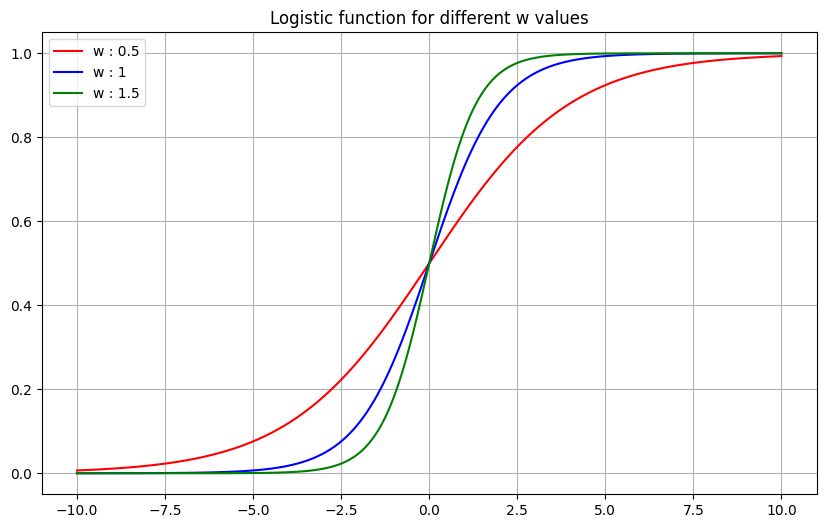

In [97]:
# 로지스틱 함수 -> 코드로 구하기
# 로지스틱 함수 정의
def logistic_function(x,w,b=0):
    return 1/ (1+np.exp( - (w*x + b)))
x = np.linspace(-10, 10, 1000)  
w_values = [0.5,1,1.5] # w (가중치) 
colors = ['red','blue','green']

plt.figure(figsize=(10,6))

for w, color in zip(w_values,colors):
    y = logistic_function(x,w) # 로지스틱 함수 호출
    plt.plot(x,y,color=color,label=f'w : {w}')
plt.title('Logistic function for different w values')
plt.grid()
plt.legend()
plt.show()